1.	Consider the following set of frequent3-itemsets: {a, b, c}, {a, b, d}, {a, b, e}, {a, c, d}, {a, c, e}, {a, c, f}, {a, d, f}, {b, c, d}, {b, c, e}, {b, d, f}, {c, d, e}, {c, d, f}.

a.	List all candidate 4-itemsets that can be generated from the frequent 3- itemsets using the candidate generation procedure for Apriori.

b.	Based on the list of frequent 3-itemsets given above, is it possible to generate a frequent 5-itemset? State your reason clearly.


LS: a) abcd, abce, abcf, acde, acdf, acde, adef, bcde, bcdf, cdef

LS: b) yes, you can create three 5 itemsets, abcde, abcdf and bcdef, since there are six items.

2.	Consider a transaction dataset that contains five items, {A, B, C, D, E}.

a.	Suppose the support of {A, B} is the same as the support of {A, B, C}, which one of the following statements are true? Explain or show a counter example.

i.	Support of {A, B} is the same as support of {A, C}.

ii.	The confidence of the rule {A, B} → {C} is 100%.


iii.	The support of {A, B, D} is the same as the support of {B, C, D}

b.	Suppose all the transactions that contain {A, B} also contain {B, C}, which one of the following statements are true:

i.	The confidence of the rule {A, B} → {C} is 100%.

ii.	The support of {A, B, D} is the same as the support of {B, C, D}.


LS a: The definition of support is: Fraction of transactions containing the itemset. I think this i is true because both ac and ab are subsets of abc, so they should have the same support.

b: The definition of confidence is: Probability of occurrence of {Y} given {X} is present. i is true.




3.	Given the following transaction table:

TID	Items
1	{A,B,C,D}
2	{A,C}
3	{B,C,E}
4	{B,D,E}
5	{A,C,D}
6	{A,B,D}
7	{B,E}
8	{A,B,C,E}
9	{A,B,C}
10	{A,B,D,E}

Given the following lattice of all the possible frequent itemsets, label each itemset as follows. Assume that the support threshold is 3. A node can have more than one label. For example, if an itemset is maximal frequent, its corresponding node should have 3 labels, F,C,M because all maximal frequent itemsets are closed. A node can be closed but not frequent if its support is different than the support for all of its parents. You do not have to label the null node.
N: If the itemset is not generated as a candidate itemset by the Apriori algorithm (using the candidate generation procedure described in class).
P: If the itemset is generated as a candidate itemset by the Apriori algorithm but was subsequently pruned during the candidate pruning step.
I: If the itemset is generated as a candidate itemset by the Apriori algorithm, survives the candidate pruning step, but fails the minsup threshold after determining its support from the transaction database.
F: If the itemset is generated as a frequent itemset.
C: If the itemset is closed. (w9e did not cover this yet in class, so you can add it in after class on 4/18)
M: If the itemset is maximal frequent. (we did not cover this yet in class, so you can add it in after class on 4/18.





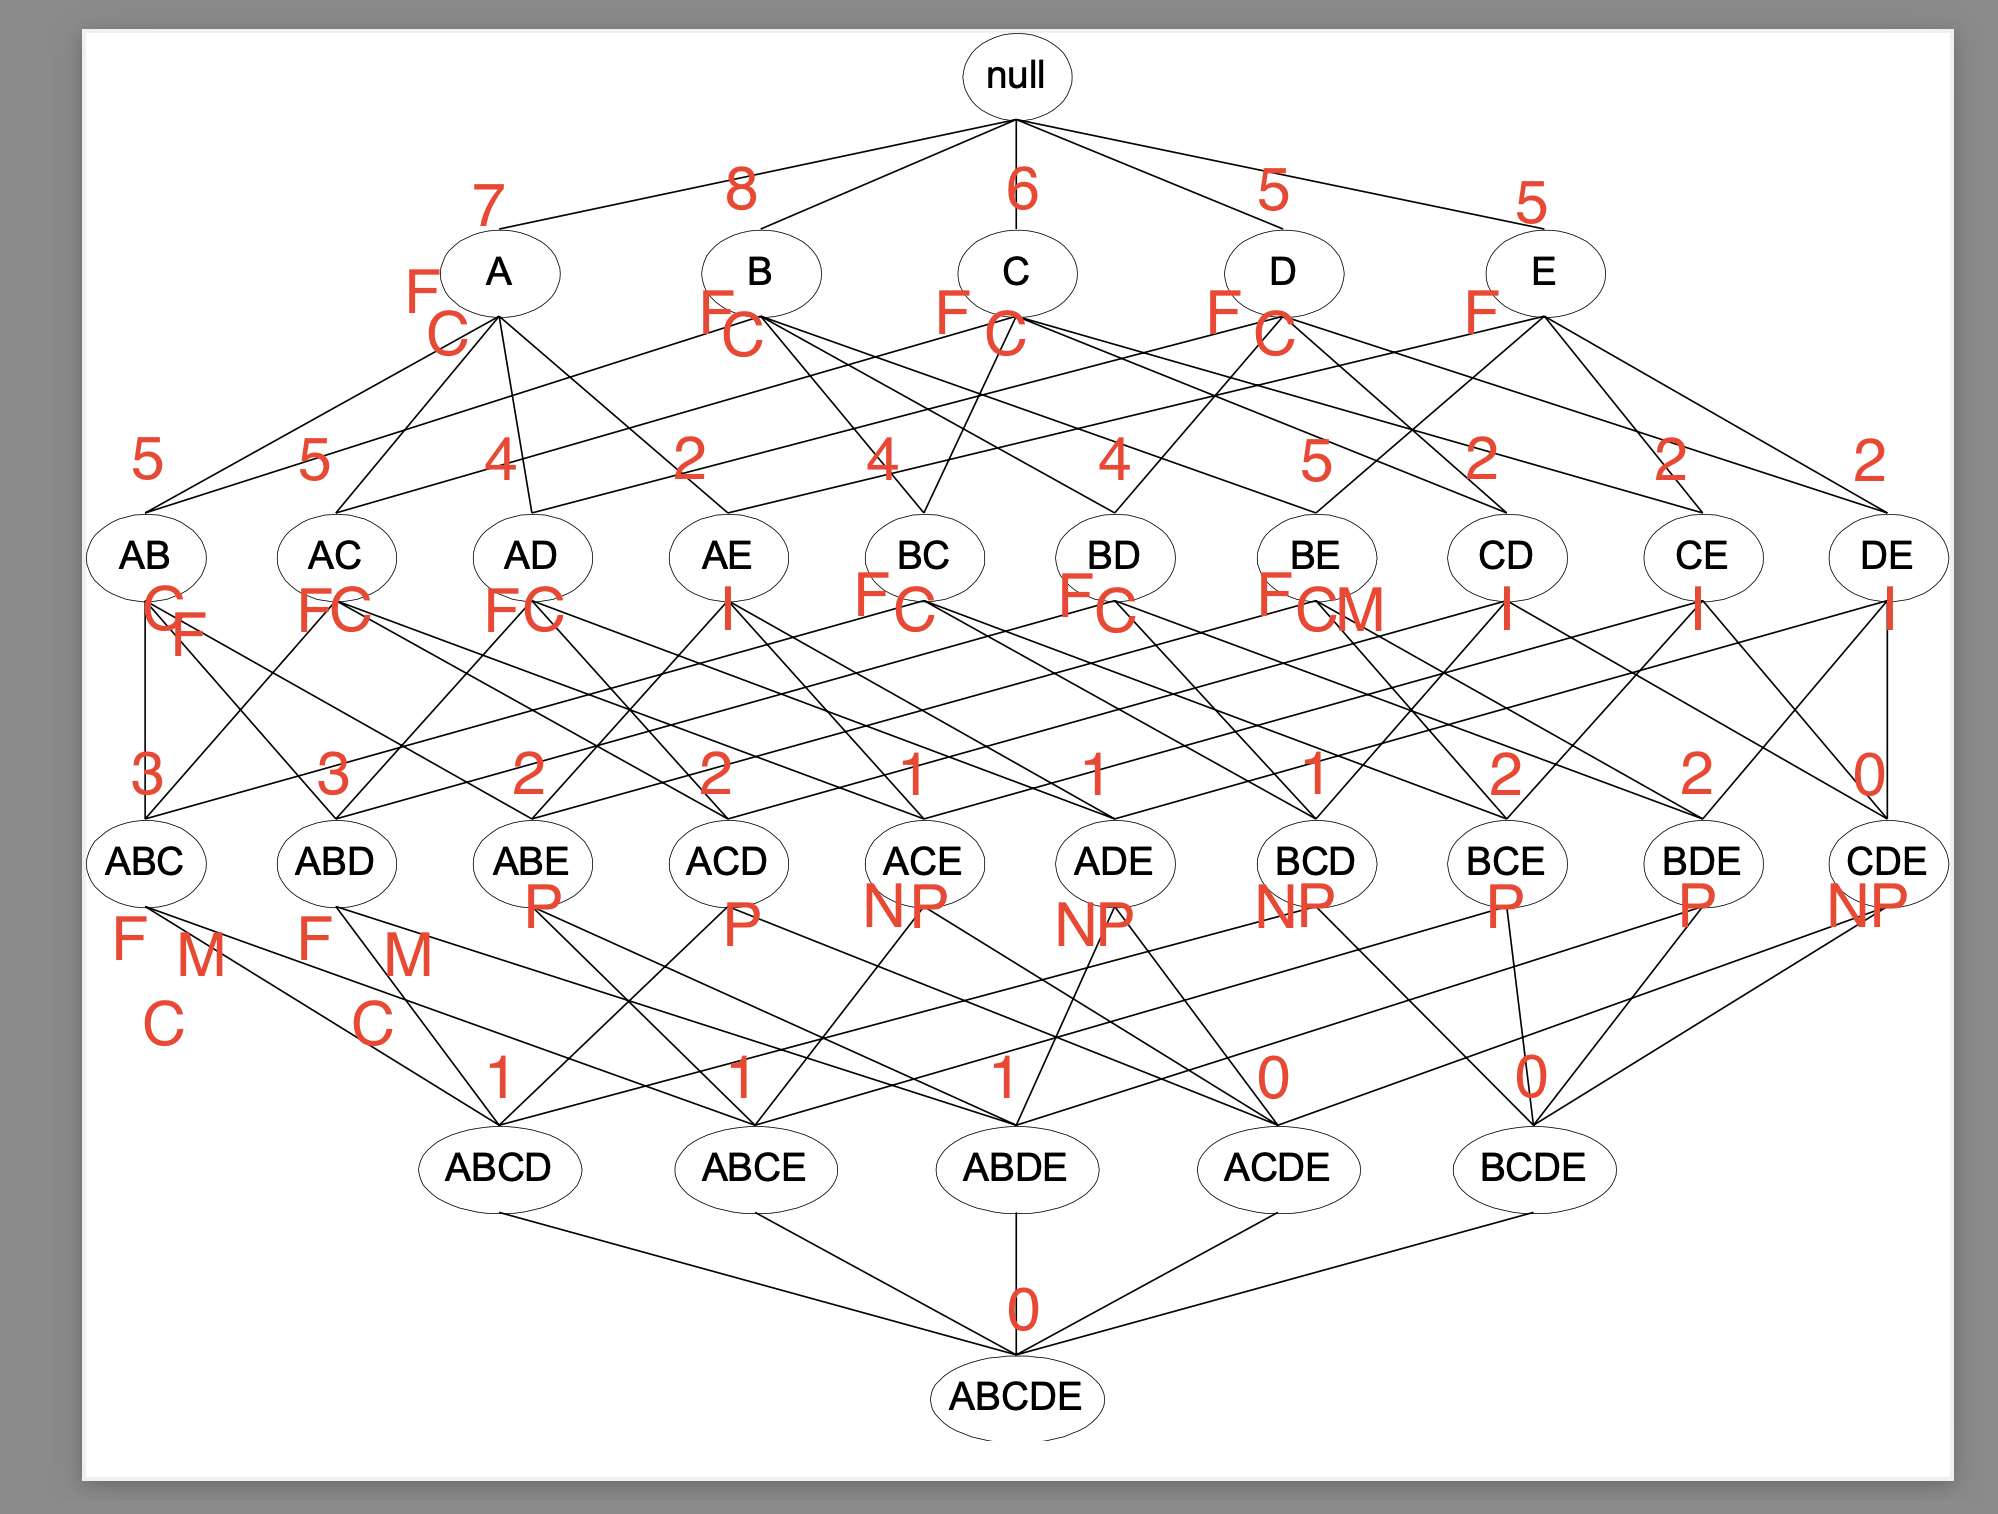

4.	Let us try finding association rules using Python. Upload our python notebook or .py file. Your book does not have a tutorial on this one, so first do an example from the web. Here is a good, simple one Introduction to Market Basket Analysis in Python - Practical Business Python (pbpython.com)

(Here are two others that use NYC datasets!!
https://chih-ling-hsu.github.io/2018/01/01/association-rule-mining
and
https://github.com/rohanag/ADB-AssocRuleMining)

Using either the banking data set or the ham/spam dataset, or both(THE LINKS FOR THESE ARE IN PREVIOUS HOMEWORKS), find association rules using at least two different levels of support.
Note that you may be limited to Boolean data types and you may need to change the datatypes of dataframe columns to boolean. Use astype:  df['column_name'] = df['column_name'].astype('bool')


In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

from google.colab import files
uploaded = files.upload()

Saving bankingLoans.csv to bankingLoans (1).csv


In [ ]:
df = pd.read_csv("bankingLoans.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan'],
      dtype='object')

In [ ]:
df = df[["Mortgage", "Securities Account", "CD Account", "Online", "CreditCard", "Personal Loan"]]

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [ ]:
basket_sets = df.applymap(encode_units)

In [ ]:
basket_sets.head()

,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,1,0


In [ ]:
basket_sets = basket_sets.replace(np.nan, 0)

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Mortgage),(CD Account),0.3076,0.0604,0.0230,0.074772,1.237954,0.004421,1.015534
1,(CD Account),(Mortgage),0.0604,0.3076,0.0230,0.380795,1.237954,0.004421,1.118207
2,(Mortgage),(Personal Loan),0.3076,0.0960,0.0336,0.109233,1.137841,0.004070,1.014855
3,(Personal Loan),(Mortgage),0.0960,0.3076,0.0336,0.350000,1.137841,0.004070,1.065231
4,(Securities Account),(CD Account),0.1044,0.0604,0.0294,0.281609,4.662404,0.023094,1.307923
5,(CD Account),(Securities Account),0.0604,0.1044,0.0294,0.486755,4.662404,0.023094,1.744975
6,(Securities Account),(Online),0.1044,0.5968,0.0642,0.614943,1.030400,0.001894,1.047116
7,(Online),(Securities Account),0.5968,0.1044,0.0642,0.107574,1.030400,0.001894,1.003556
8,(Online),(CD Account),0.5968,0.0604,0.0566,0.094839,1.570184,0.020553,1.038048
9,(CD Account),(Online),0.0604,0.5968,0.0566,0.937086,1.570184,0.020553,6.408758


In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.15, use_colnames=True)

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CreditCard),(Online),0.2940,0.5968,0.1764,0.600000,1.005362,0.000941,1.008000
1,(Online),(CreditCard),0.5968,0.2940,0.1764,0.295576,1.005362,0.000941,1.002238


Changing the support from seven percent to fifteen percent dramatically reduced the number of association rules, showing that at a higher level of support credit card and online have reciprocal antecedent, consequent relationships.